# Heart Disease Decision Tree Learning

In [2]:
# Load libraries 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module untuk perhitungan akurasi
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

## Import dataset dan menampilkan dataset

In [7]:
# col_names = ['Heart Disease', 'BMI', 'Smoking', 'Alcohol Drinking', 'Stroke', 'Physical Health', 'Mental Health', 'Sex', 'Age Category', 'Sleep Time']
col_remove = ['DiffWalking', 'Race', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']
# load dataset
# Load the dataset with the correct delimiter and use the first row as column names
pima = pd.read_csv("heart_2020_cleaned.csv", delimiter=',', header=0)

# List of columns to remove
columns_to_remove = ['DiffWalking', 'Race', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Remove specified columns
pima = pima.drop(columns=columns_to_remove)

# Display the modified DataFrame
pima.head()







,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime
0,No,16.60,Yes,No,No,3.0,30.0,Female,55-59,Yes,Very good,5.0
1,No,20.34,No,No,Yes,0.0,0.0,Female,80 or older,Yes,Very good,7.0
2,No,26.58,Yes,No,No,20.0,30.0,Male,65-69,Yes,Fair,8.0
3,No,24.21,No,No,No,0.0,0.0,Female,75-79,No,Good,6.0
4,No,23.71,No,No,No,28.0,0.0,Female,40-44,Yes,Very good,8.0


### Untuk menghitung True dan False yang mengidap penyakit jantung

In [8]:
heart_disease_counts = pima['HeartDisease'].value_counts()

# Access the counts for 'Yes' and 'No'
yes_count = heart_disease_counts['Yes']
no_count = heart_disease_counts['No']

print("Count of 'Yes':", yes_count)
print("Count of 'No':", no_count)

Count of 'Yes': 27373
Count of 'No': 292422


## Deklarasi vektor dan target variabel

In [9]:

x = pima.drop('HeartDisease', axis=1) # Features
y = pima['HeartDisease'] # Target variable

## Split data menjadi training dan test set

In [10]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training dan 30% test

x_train.shape, x_test.shape

x_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime
273582,43.40,No,No,No,2.0,5.0,Male,50-54,Yes,Good,8.0
54829,36.85,Yes,No,No,20.0,0.0,Female,70-74,No,Good,8.0
1482,35.70,No,No,No,25.0,25.0,Female,50-54,No,Good,5.0
17407,27.07,Yes,No,No,5.0,30.0,Female,45-49,Yes,Very good,5.0
116646,25.02,No,No,No,5.0,0.0,Male,35-39,No,Excellent,7.0


In [11]:
# import category encoders
import category_encoders as ce

In [12]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'Sex', 'AgeCategory', 'PhysicalActivity', 'GenHealth', 'SleepTime'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

x_train.head()


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime
273582,1,1,1,1,1,1,1,1,1,1,1
54829,2,2,1,1,2,2,2,2,2,1,1
1482,3,1,1,1,3,3,2,1,2,1,2
17407,4,2,1,1,4,4,2,3,1,2,2
116646,5,1,1,1,4,2,1,4,2,3,3


In [13]:
x_test.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime
301988,1081.0,1,1,1,5,13,2,12,1,3,3
223127,92.0,2,1,2,5,2,2,8,2,1,3
216797,72.0,2,1,1,5,2,2,2,1,1,3
234217,216.0,2,1,1,5,9,2,5,2,1,7
30822,132.0,1,1,1,5,2,1,6,1,3,1


## Decision Tree Classifier Entropy

In [14]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [15]:
y_pred_en = clf_en.predict(x_test)

print('Model accuracy : {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy : 0.9154


## Compare the train-set and test-set accuracy

In [16]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [17]:
print('Training-set accuracy : {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy : 0.9149


## Visualize decision-trees

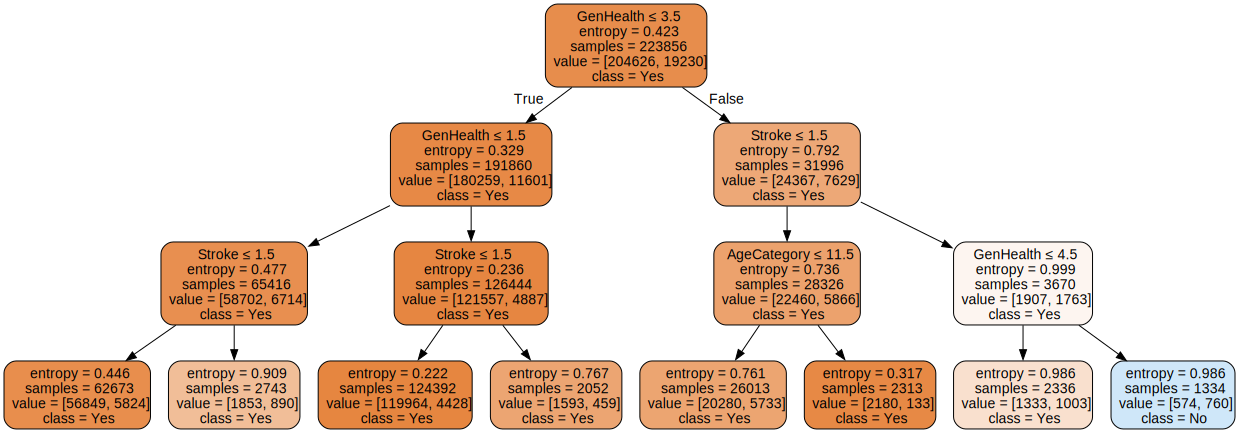

In [18]:
dot_data = tree.export_graphviz(clf_en, out_file=None, feature_names=x_train.columns, class_names=y_train, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)

graph